In [1]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Define the path for your venv on Google Drive
# Make sure 'MyColabVenvs' directory exists in your Drive, or choose another path

PACKAGES_PATH = '/content/drive/MyDrive/MyColabVenvs/my_project_env'
!mkdir -p {PACKAGES_PATH} # Create if it doesn't exist


VENV_PATH = '/content/drive/MyDrive/MyColabVenvs/my_project_env'

PYTHON_VERSION = 'python3.10' # Or your desired Colab Python version (check with !python --version)

# 3. Create the virtual environment (only needs to be done once)
# We'll use --upgrade-deps for simplicity here.
!python -m venv --upgrade-deps {VENV_PATH}

# 4. "Activate" the venv for the Python kernel by modifying sys.path

import sys
import os

# Path to site-packages in the venv

venv_site_packages = os.path.join(VENV_PATH, 'lib', PYTHON_VERSION, 'site-packages')

# Add the venv's site-packages to the Python path
if venv_site_packages not in sys.path:
    sys.path.insert(0, venv_site_packages)
    print(f"Added {venv_site_packages} to sys.path")

# (Optional) You can also set environment variables if your scripts/tools expect them
os.environ['VIRTUAL_ENV'] = VENV_PATH
os.environ['PATH'] = os.path.join(VENV_PATH, 'bin') + os.pathsep + os.environ['PATH']
print(f"VIRTUAL_ENV set to: {os.getenv('VIRTUAL_ENV')}")
print(f"PATH starts with: {os.environ['PATH'].split(os.pathsep)[0]}")


# 5. Install packages into the venv using the venv's pip


!{VENV_PATH}/bin/pip install numpy pandas matplotlib seaborn geopandas shapely.geometry plotly.express plotly.graph_objects

# 6. Verify (check where packages are installed and which Python is used)
print("\n--- Verification ---")
print(f"Current Python Executable: {sys.executable}") # This will still be Colab's Python
                                                      # but sys.path makes it find venv packages first.

# To check where a package is loaded from:
import numpy
import pandas
print(f"Numpy location: {numpy.__file__}")
print(f"Pandas location: {pandas.__file__}")

# You can also run shell commands using the venv's Python
!{VENV_PATH}/bin/python --version
!{VENV_PATH}/bin/pip list | grep numpy

Mounted at /content/drive
Error: Command '['/content/drive/MyDrive/MyColabVenvs/my_project_env/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
Added /content/drive/MyDrive/MyColabVenvs/my_project_env/lib/python3.10/site-packages to sys.path
VIRTUAL_ENV set to: /content/drive/MyDrive/MyColabVenvs/my_project_env
PATH starts with: /content/drive/MyDrive/MyColabVenvs/my_project_env/bin
/bin/bash: line 1: /content/drive/MyDrive/MyColabVenvs/my_project_env/bin/pip: No such file or directory

--- Verification ---
Current Python Executable: /usr/bin/python3
Numpy location: /usr/local/lib/python3.11/dist-packages/numpy/__init__.py
Pandas location: /usr/local/lib/python3.11/dist-packages/pandas/__init__.py
Python 3.11.12
/bin/bash: line 1: /content/drive/MyDrive/MyColabVenvs/my_project_env/bin/pip: No such file or directory


#TASK **1** (PREPROCESSING)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from shapely.geometry import Point, Polygon
import plotly.express as px
import plotly.graph_objects as go


In [3]:
vessel_charachteristics=pd.read_csv('vessel_characteristics.csv')
vessel_charachteristics.head()


<ipython-input-3-9f4781de1521>:1: DtypeWarning: Columns (42,47,72,81,154,163,210) have mixed types. Specify dtype option on import or set low_memory=False.
  vessel_charachteristics=pd.read_csv('vessel_characteristics.csv')


,id,imo,axs_notes_dry,name,type,subtype,ship_status,registered_owner,ship_owner,tc_operator,...,cranes_number,cranes_swl,cranes_outreach,cranes_position,hold_details,hatches_details,private_comments,private_tags,conversion_date,private_notes
0,83576,9122590,NaN,BERGE FUJI,Bulk carrier,Ore Carrier,DELIVERED,BERGE MAUNA KEA CO SA,BERGE BULK,BERGE BULK,...,0,0.0,0,NaN,NaN,NaN,0,NaN,NaN,NaN
1,94194,9237230,NaN,XH VOYAGER,Bulk carrier,Ore Carrier,DELIVERED,FOND MARINE PTE LTD,ZHOUSHAN XIEHAI SHIPPING,ZHOUSHAN XIEHAI SHIPPING,...,0,0.0,0,NaN,No. 1 : - cbm;No. 2 : - cbm;No. 3 : - cbm;No. ...,No. 1 : - m X - m;No. 2 : - m X - m;No. 3 : - ...,0,NaN,NaN,NaN
2,97323,9270567,NaN,CAPE TOUCAN,Bulk carrier,Ore Carrier,DELIVERED,POLGRYN SHIPPING INC,ZODIAC MARITIME,ZODIAC MARITIME,...,0,0.0,0,NaN,No. 1 : - cbm;No. 2 : - cbm;No. 3 : - cbm;No. ...,No. 1 : 16.91 m X 16 m;No. 2 : 16.91 m X 16 m;...,0,NaN,NaN,NaN
3,98092,9279393,NaN,WINNING EXCELLENCE,Bulk carrier,Ore Carrier,DELIVERED,WINNING EXCELLENCE SHIPPING PTE LTD,WINNING SHIPPING HK,WINNING SHIPPING HK,...,0,0.0,0,NaN,NaN,NaN,0,NaN,NaN,NaN
4,102164,9321275,NaN,BRASIL MARU,Bulk carrier,Ore Carrier,DELIVERED,MOL,MOL,MOL,...,0,0.0,0,NaN,NaN,NaN,0,NaN,NaN,NaN


In [4]:
vessel_positions=pd.read_csv('vessel_positions.csv')
vessel_positions.head()

<ipython-input-4-1ac1eff41f55>:1: DtypeWarning: Columns (13,14,20,21,25,26,29,30,32,51) have mixed types. Specify dtype option on import or set low_memory=False.
  vessel_positions=pd.read_csv('vessel_positions.csv')


,index,imo,vessel_dwt,status_date_time,in_blackout,ais_speed,ais_draft,vessel_speed_ratio,ais_lat,ais_long,...,real_destination_country_name,real_destination_zone_id,real_destination_zone_name,vessel_operational_status,vessel_commodity_onboard,vessel_commodity_group_onboard,voyage_intake_mt,last_seen,during_cabotage_voyage,vessel_operational_status_group
0,0,1014149,11717,20/08/2024,0,0.0,5.1,NaN,34.3504,133.877,...,Japan,73.0,Far East,waiting_load,NaN,NaN,NaN,19/08/2024 23:56,1,at_port_waiting_load_group
1,1,1014163,39815,20/08/2024,0,0.0,6.1,NaN,-33.8022,137.052,...,China,73.0,Far East,at_port_load,Grain,Grain,27320.0,19/08/2024 23:56,0,in_port_loading_group
2,2,1014199,11722,20/08/2024,0,0.0,4.4,NaN,34.4042,133.425,...,Japan,73.0,Far East,waiting_load,NaN,NaN,NaN,19/08/2024 23:59,1,at_port_waiting_load_group
3,3,1014254,13465,20/08/2024,0,11.8,9.5,NaN,11.7398,109.489,...,Japan,73.0,Far East,at_sea_laden,Steels,Steels,12353.0,19/08/2024 23:59,1,at_sea_laden_group
4,4,1014591,39415,20/08/2024,0,11.0,10.6,NaN,16.4267,113.858,...,NaN,NaN,NaN,at_sea_laden,Steels,Steels,36350.0,19/08/2024 23:52,0,at_sea_laden_group


In [5]:
print("--- Ship Positions Info ---")
vessel_charachteristics.info()

print("\n--- Ship Positions Description (Numerical) ---")
print(vessel_charachteristics.describe())

print("\n--- Ship Positions Description (Categorical/Object) ---")
print(vessel_charachteristics.describe(include=['object']))

print(f"\nNumber of unique IMO numbers in positions data: {vessel_charachteristics['imo'].nunique()}")

--- Ship Positions Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14757 entries, 0 to 14756
Columns: 212 entries, id to private_notes
dtypes: float64(116), int64(32), object(64)
memory usage: 23.9+ MB

--- Ship Positions Description (Numerical) ---
                  id           imo           dwt  summer_fresh_water_dwt  \
count   14757.000000  1.475700e+04   14757.00000            14757.000000   
mean   139385.153961  8.582214e+06   75562.76811            26191.976689   
std     43030.409131  2.734575e+06   59713.40670            44305.350957   
min      4929.000000  2.000000e+04     736.00000                0.000000   
25%    113155.000000  9.284300e+06   38582.00000                0.000000   
50%    130670.000000  9.546784e+06   61671.00000                0.000000   
75%    151685.000000  9.730206e+06   82000.00000            55682.000000   
max    218431.000000  9.999864e+06  403880.00000           404382.000000   

       winter_salt_water_dwt  tropical_salt_water_dwt 

In [6]:
print("--- Ship Positions Info ---")
vessel_positions.info()

print("\n--- Ship Positions Description (Numerical) ---")
print(vessel_positions.describe())

print("\n--- Ship Positions Description (Categorical/Object) ---")
print(vessel_positions.describe(include=['object']))

print(f"\nNumber of unique IMO numbers in positions data: {vessel_positions['imo'].nunique()}")

--- Ship Positions Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71635 entries, 0 to 71634
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            71635 non-null  int64  
 1   imo                              71635 non-null  int64  
 2   vessel_dwt                       71635 non-null  int64  
 3   status_date_time                 71635 non-null  object 
 4   in_blackout                      71635 non-null  int64  
 5   ais_speed                        71635 non-null  float64
 6   ais_draft                        71635 non-null  float64
 7   vessel_speed_ratio               62885 non-null  float64
 8   ais_lat                          71634 non-null  float64
 9   ais_long                         71634 non-null  float64
 10  vessel_draft_status              71581 non-null  object 
 11  zone_id                          71172 non-null  flo

*We observe 14330 total unique ships present in vessel_positions.csv out of the 14757 vessels in vessel_charachteristics.csv*

####Converting date time columns (format day/month/year hh:mm) in vessel_positions.csv

In [7]:
columns_to_convert = [
    'zone_entry_time', 'zone_out_time',
    'port_entry_time', 'port_out_time', 'operation_location_entry_time',
    'operation_location_out_time', 'waiting_zone_entry_time',
    'waiting_zone_out_time', 'ais_eta', 'last_seen'
]

# Define the expected format of your date strings (DD/MM/YYYY HH:MM)

date_format = "%d/%m/%Y %H:%M"



for col in columns_to_convert:
    print(f"Converting column '{col}' to datetime...")
    # Use pd.to_datetime with errors='coerce'
    # format=date_format helps pd.to_datetime understand the expected format
    # errors='coerce' will turn any value that CANNOT be parsed into NaT (Not a Time, pandas' null for datetime)
    vessel_positions[col] = pd.to_datetime(vessel_positions[col], format=date_format, errors='coerce')

print("\nDataFrame Info After Conversion (showing datetime type):")
vessel_positions.info()


Converting column 'zone_entry_time' to datetime...
Converting column 'zone_out_time' to datetime...
Converting column 'port_entry_time' to datetime...
Converting column 'port_out_time' to datetime...
Converting column 'operation_location_entry_time' to datetime...
Converting column 'operation_location_out_time' to datetime...
Converting column 'waiting_zone_entry_time' to datetime...
Converting column 'waiting_zone_out_time' to datetime...
Converting column 'ais_eta' to datetime...
Converting column 'last_seen' to datetime...

DataFrame Info After Conversion (showing datetime type):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71635 entries, 0 to 71634
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            71635 non-null  int64         
 1   imo                              71635 non-null  int64         
 2   vessel_dwt          

####Converting date time columns (format day/month/year) in vessel_positions.csv

In [8]:
columns_to_convert = ['status_date_time', 'updated_at']

# Define the expected format of your date strings (DD/MM/YYYY)
date_format = "%d/%m/%Y"


for col in columns_to_convert:
    print(f"Converting column '{col}' to datetime...")

    # errors='coerce' will turn any value that CANNOT be parsed into NaT
    vessel_positions[col] = pd.to_datetime(vessel_positions[col], format=date_format, errors='coerce')

print("\nDataFrame Info After Conversion (showing datetime type):")
vessel_positions.info()

Converting column 'status_date_time' to datetime...
Converting column 'updated_at' to datetime...

DataFrame Info After Conversion (showing datetime type):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71635 entries, 0 to 71634
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            71635 non-null  int64         
 1   imo                              71635 non-null  int64         
 2   vessel_dwt                       71635 non-null  int64         
 3   status_date_time                 71635 non-null  datetime64[ns]
 4   in_blackout                      71635 non-null  int64         
 5   ais_speed                        71635 non-null  float64       
 6   ais_draft                        71635 non-null  float64       
 7   vessel_speed_ratio               62885 non-null  float64       
 8   ais_lat                          71634 n

####Dropping Columns in vessel_charachteristics if missing values > 95%

In [9]:
# We want to drop columns with >= 95% missing values
threshold_percentage = 95.0

# Calculate the percentage of missing values for each column

missing_percentage = (vessel_charachteristics.isnull().sum() / vessel_charachteristics.shape[0]) * 100

print("\nPercentage of Missing Values per Column:")
print(missing_percentage)
print("-" * 30)

# Identify columns that meet the threshold

columns_to_drop = missing_percentage[missing_percentage >= threshold_percentage].index.tolist()

print(f"\nColumns to drop (>= {threshold_percentage}% missing):")
print(columns_to_drop)
print("-" * 30)

# Drop the identified columns

vessel_charachteristics = vessel_charachteristics.drop(columns=columns_to_drop, inplace=False)


Percentage of Missing Values per Column:
id                    0.000000
imo                   0.000000
axs_notes_dry        81.845904
name                  0.000000
type                  0.000000
                       ...    
hatches_details      24.584943
private_comments      0.000000
private_tags        100.000000
conversion_date      99.993224
private_notes       100.000000
Length: 212, dtype: float64
------------------------------

Columns to drop (>= 95.0% missing):
['second_shipyard', 'bow_thruster', 'stern_thruster', 'lakes_fitted', 'technical_manager', 'pool', 'parent_shipowner', 'doc_holder', 'crew_manager', 'ism_manager', 'dual_fuel', 'demolition_country', 'second_shipyard_id', 'second_shipyard_flag', 'second_shipyard_flag_id', 'technical_manager_id', 'technical_manager_flag', 'technical_manager_flag_id', 'pool_id', 'pool_flag', 'pool_flag_id', 'parent_shipowner_id', 'parent_shipowner_flag', 'parent_shipowner_flag_id', 'doc_holder_id', 'doc_holder_flag', 'doc_holder_flag_i

####Capping ais_speed data in vessel_positions.csv

In [10]:

    print("\n AIS Speed Stats (Original) ")
    print(vessel_positions['ais_speed'].describe())

    # Cap unrealistic speeds. A VLOC's top speed is rarely above 15-17 knots.
    # AIS can sometimes report erroneous high speeds. Let's cap at around 35 knots.
    # Speeds of 0 are valid (e.g., at anchor/port).
    original_max_speed = vessel_positions['ais_speed'].max()
    vessel_positions['ais_speed'] = np.where(vessel_positions['ais_speed'] < 0, 0, vessel_positions['ais_speed']) # Negative speeds to 0
    vessel_positions['ais_speed'] = np.where(vessel_positions['ais_speed'] > 35, 35, vessel_positions['ais_speed']) # Cap at 35 knots

    print("\n--- AIS Speed Stats (Corrected for >35 knots and <0) ---")
    print(vessel_positions['ais_speed'].describe())
    if original_max_speed > 35:
        print(f"Note: AIS speeds > 35 knots were capped at 35 knots. Original max was {original_max_speed}.")


 AIS Speed Stats (Original) 
count    71635.000000
mean         6.060473
std          6.414644
min          0.000000
25%          0.000000
50%          8.000000
75%         11.200000
max        102.300000
Name: ais_speed, dtype: float64

--- AIS Speed Stats (Corrected for >35 knots and <0) ---
count    71635.000000
mean         5.985649
std          5.744908
min          0.000000
25%          0.000000
50%          8.000000
75%         11.200000
max         35.000000
Name: ais_speed, dtype: float64
Note: AIS speeds > 35 knots were capped at 35 knots. Original max was 102.3.


####Capping ais_draft values in vessel_positions.csv

In [11]:

print("\n  AIS Draft Stats (Original) ")
print(vessel_positions['ais_draft'].describe())

# Drafts should be positive. Max draft for largest vessels is around 23-25m. I capped at 30m.
original_max_draft = vessel_positions['ais_draft'].max()
vessel_positions['ais_draft'] = np.where(vessel_positions['ais_draft'] < 0, 0, vessel_positions['ais_draft']) # Negative drafts to 0
vessel_positions['ais_draft'] = np.where(vessel_positions['ais_draft'] > 30, 30, vessel_positions['ais_draft']) # Cap at 30 meters

print("\n  AIS Draft Stats (Corrected for >30m and <0) ")
print(vessel_positions['ais_draft'].describe())
if original_max_draft > 30:
    print(f"Note: AIS drafts > 30m were capped at 30m. Original max was {original_max_draft}.")


  AIS Draft Stats (Original) 
count    71635.000000
mean         9.759088
std          3.408379
min          0.000000
25%          7.100000
50%          9.200000
75%         12.000000
max         25.500000
Name: ais_draft, dtype: float64

  AIS Draft Stats (Corrected for >30m and <0) 
count    71635.000000
mean         9.759088
std          3.408379
min          0.000000
25%          7.100000
50%          9.200000
75%         12.000000
max         25.500000
Name: ais_draft, dtype: float64


####Imputing null values in vessel_positions.csv in columns {*origin_country_name, real_destination_country_name, vessel_commodity_group_onboard, vessel_commodity_onboard*}

*Note:imputing may take a minute*

In [12]:


# 1. Define column names to impute
imo_column = 'imo'
columns_to_check_for_inconsistency = [
    'origin_country_name',
    'real_destination_country_name',
    'vessel_commodity_group_onboard',
    'vessel_commodity_onboard'
]

# 3. Get all unique IMO values
unique_imos = vessel_positions[imo_column].unique()
print(f"Found {len(unique_imos)} unique IMO values.")
print("-" * 60)

#IMPUTATION LOGIC
print("\nStarting imputation for inconsistent null values...")
imputation_summary = {col: {'imputed_imos': set(), 'values_imputed': 0} for col in columns_to_check_for_inconsistency}

for current_imo in unique_imos:
    # Get all rows for the current IMO
    imo_rows_indices = vessel_positions[vessel_positions[imo_column] == current_imo].index

    for col_to_check in columns_to_check_for_inconsistency:
        # Extract the series for this IMO and column
        series_for_imo_col = vessel_positions.loc[imo_rows_indices, col_to_check]

        # Check for presence of nulls and non-nulls
        has_nulls = series_for_imo_col.isnull().any()
        has_non_nulls = series_for_imo_col.notnull().any()

        if has_nulls and has_non_nulls:
            # Get unique non-null values
            unique_non_null_values = series_for_imo_col.dropna().unique()

            if len(unique_non_null_values) == 1:
                # If there's exactly one unique non-null value, use it for imputation
                imputation_value = unique_non_null_values[0]
                null_mask_for_imo_col = series_for_imo_col.isnull()
                num_to_impute = null_mask_for_imo_col.sum()

                if num_to_impute > 0:
                    # Apply imputation to the original DataFrame for the specific rows and column
                    vessel_positions.loc[imo_rows_indices[null_mask_for_imo_col], col_to_check] = imputation_value
                    imputation_summary[col_to_check]['imputed_imos'].add(current_imo)
                    imputation_summary[col_to_check]['values_imputed'] += num_to_impute

print("\n--- Imputation Summary ---")
for col, summary in imputation_summary.items():
    print(f"Column '{col}':")
    print(f"  IMOs affected by imputation: {len(summary['imputed_imos'])}")
    print(f"  Total NaN values imputed: {summary['values_imputed']}")
print("--- Finished imputation ---")
# END: IMPUTATION LOGIC


# 4. Loop through each unique IMO and collect relevant information (POST-IMPUTATION) ---
# The 'results' dictionary will now reflect the state *after* imputation.
results = {}
print(f"\nRe-checking data for {len(unique_imos)} unique IMO values after imputation...")
print("-" * 60)

for current_imo in unique_imos:
    imo_rows = vessel_positions[vessel_positions[imo_column] == current_imo]
    num_rows = len(imo_rows)

    unique_counts_for_imo = {}
    for col_to_check in columns_to_check_for_inconsistency:
        unique_counts_for_imo[col_to_check] = imo_rows[col_to_check].nunique(dropna=False) # dropna=False counts NaN as a unique value

    results[current_imo] = {
        'num_rows': num_rows,
        'unique_counts': unique_counts_for_imo
    }
print("\n--- Finished processing all unique IMOs (post-imputation) ---")


# 5. Count IMOs based on the collected information (POST-IMPUTATION) ---
count_less_than_5_rows = 0
counts_inconsistent = {col: 0 for col in columns_to_check_for_inconsistency}
imos_inconsistent_by_column = {col: [] for col in columns_to_check_for_inconsistency}

for imo, data in results.items():
    if data['num_rows'] < 5:
        count_less_than_5_rows += 1

    for col_name, num_unique_values in data['unique_counts'].items():
        # An IMO is inconsistent in a column if it has more than 1 distinct value.
        # After imputation, if an IMO had one value and NaNs, it should now have only one value.
        # If it still has NaNs, it means all its values were NaN or it had multiple non-NaN values.
        if num_unique_values > 1:
            counts_inconsistent[col_name] += 1
            imos_inconsistent_by_column[col_name].append(imo)

# 6. Print the final counts (POST-IMPUTATION)
print(f"\nTotal number of IMOs found: {len(unique_imos)}")
print(f"Number of IMOs with less than 5 rows/observations: {count_less_than_5_rows}")

print("\n--- Inconsistency Counts (POST-IMPUTATION) ---")
print("(More than 1 distinct value, if still present, per IMO)")
for col_name in columns_to_check_for_inconsistency:
    print(f"Number of IMOs with inconsistent '{col_name}': {counts_inconsistent[col_name]}")



Found 14330 unique IMO values.
------------------------------------------------------------

Starting imputation for inconsistent null values...

--- Imputation Summary ---
Column 'origin_country_name':
  IMOs affected by imputation: 110
  Total NaN values imputed: 254
Column 'real_destination_country_name':
  IMOs affected by imputation: 143
  Total NaN values imputed: 341
Column 'vessel_commodity_group_onboard':
  IMOs affected by imputation: 2372
  Total NaN values imputed: 5860
Column 'vessel_commodity_onboard':
  IMOs affected by imputation: 2361
  Total NaN values imputed: 5841
--- Finished imputation ---

Re-checking data for 14330 unique IMO values after imputation...
------------------------------------------------------------

--- Finished processing all unique IMOs (post-imputation) ---

Total number of IMOs found: 14330
Number of IMOs with less than 5 rows/observations: 5

--- Inconsistency Counts (POST-IMPUTATION) ---
(More than 1 distinct value, if still present, per IMO)

Note: *Here null values were imputed per imo (vessel) based on a non null observation, however those remaining have distinct non null values (which requires domain expertise to choose)*

####Merging vessel_positions.csv with vessel_charachteristics.csv using left join

In [13]:

merged_df = pd.merge(vessel_positions, vessel_charachteristics.drop(columns=['id'], errors='ignore'), on='imo', how='left', suffixes=('', '_char'))
print("\n--- Merged DataFrame Info ---")
merged_df.info()
merged_df.head()


--- Merged DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71635 entries, 0 to 71634
Columns: 225 entries, index to private_comments
dtypes: datetime64[ns](12), float64(135), int64(5), object(73)
memory usage: 123.0+ MB


,index,imo,vessel_dwt,status_date_time,in_blackout,ais_speed,ais_draft,vessel_speed_ratio,ais_lat,ais_long,...,last_ss_date,next_ss_date,class_society,cranes_type,cranes_number,cranes_swl,cranes_outreach,hold_details,hatches_details,private_comments
0,0,1014149,11717,2024-08-20,0,0.0,5.1,NaN,34.3504,133.877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1014163,39815,2024-08-20,0,0.0,6.1,NaN,-33.8022,137.052,...,2024-07-11,2029-07-10,NK,Crane,4.0,30.0,0.0,No. 1 : 8530.75 cbm;No. 2 : 10577.9 cbm;No. 3 ...,No. 1 : 16.15 m X 19.2 m;No. 2 : 20.4 m X 20.8...,0.0
2,2,1014199,11722,2024-08-20,0,0.0,4.4,NaN,34.4042,133.425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1014254,13465,2024-08-20,0,11.8,9.5,NaN,11.7398,109.489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1014591,39415,2024-08-20,0,11.0,10.6,NaN,16.4267,113.858,...,2024-07-29,2029-07-29,AB,Crane,4.0,30.0,0.0,No. 1 : - cbm;No. 2 : - cbm;No. 3 : - cbm;No. ...,No. 1 : - m X - m;No. 2 : - m X - m;No. 3 : - ...,0.0


In [14]:
print(merged_df.dtypes)

index                        int64
imo                          int64
vessel_dwt                   int64
status_date_time    datetime64[ns]
in_blackout                  int64
                         ...      
cranes_swl                 float64
cranes_outreach            float64
hold_details                object
hatches_details             object
private_comments           float64
Length: 225, dtype: object


#TASK **2** (EDA)

Barchart of vessel_operational_status from vessel_positions.csv

<ipython-input-15-48d5af636cd2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")


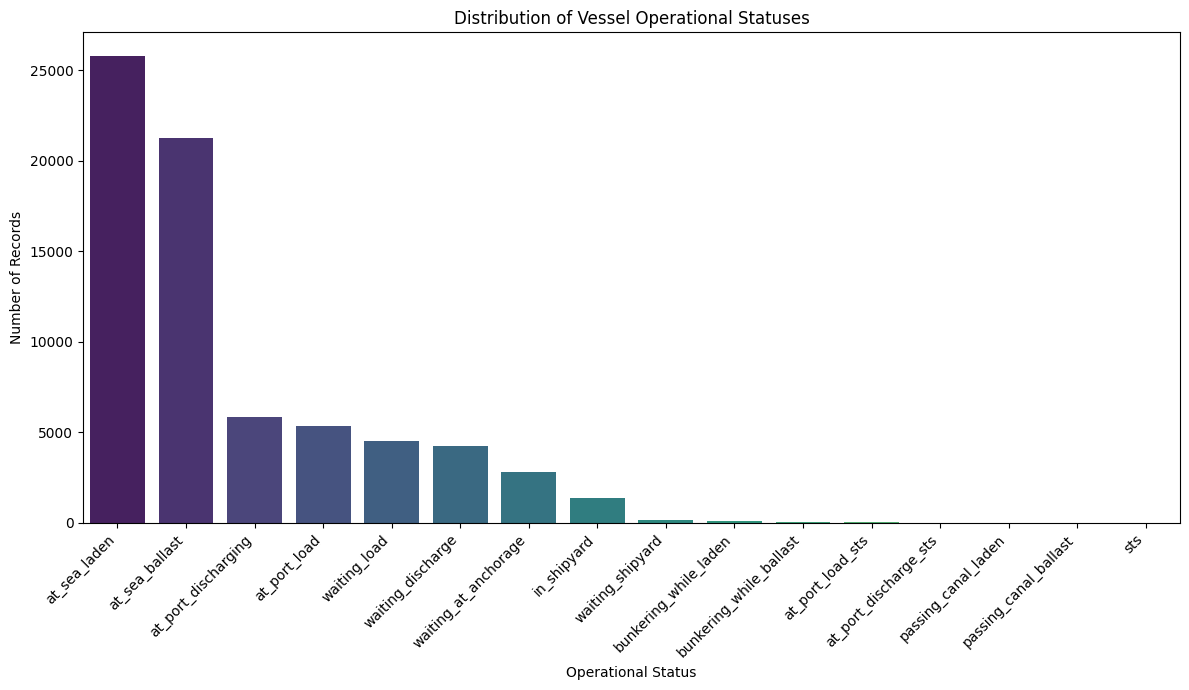


Top 10 Vessel Operational Statuses:
vessel_operational_status
at_sea_laden             25793
at_sea_ballast           21266
at_port_discharging       5831
at_port_load              5341
waiting_load              4503
waiting_discharge         4222
waiting_at_anchorage      2824
in_shipyard               1393
waiting_shipyard           154
bunkering_while_laden       95
Name: count, dtype: int64


In [15]:

  plt.figure(figsize=(12, 7))
  status_counts = merged_df['vessel_operational_status'].value_counts()
  sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")
  plt.title('Distribution of Vessel Operational Statuses')
  plt.xlabel('Operational Status')
  plt.ylabel('Number of Records')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

  print("\nTop 10 Vessel Operational Statuses:")
  print(status_counts.head(10))


*The data from vessel_positions.csv reveals that the vast majority of recorded vessel statuses are related to active transit. "At_sea_laden" (25,793 instances) and "at_sea_ballast" (21,266) overwhelmingly dominate, indicating ships spend most of their time moving, either carrying cargo or returning empty.
Following sea transit, activities directly within ports are the next most common, with "at_port_discharging" (5,831) slightly outnumbering "at_port_load" (5,341). This highlights core cargo handling operations.
Interestingly, various "waiting" statuses ("waiting_load," "waiting_discharge," "waiting_at_anchorage") collectively represent a substantial number of entries (over 11,500). This suggests that idle time, whether due to port congestion, operational scheduling, or awaiting cargo/berth availability, is a significant phase in vessel operations.
Maintenance activities, represented by "in_shipyard" (1,393), are less frequent but still notable. Overall, the snapshot depicts a fleet primarily engaged in transit and cargo handling, but with considerable time also spent in various waiting states.*

Barchart of distribution of ais_speed from vessel_positions.csv

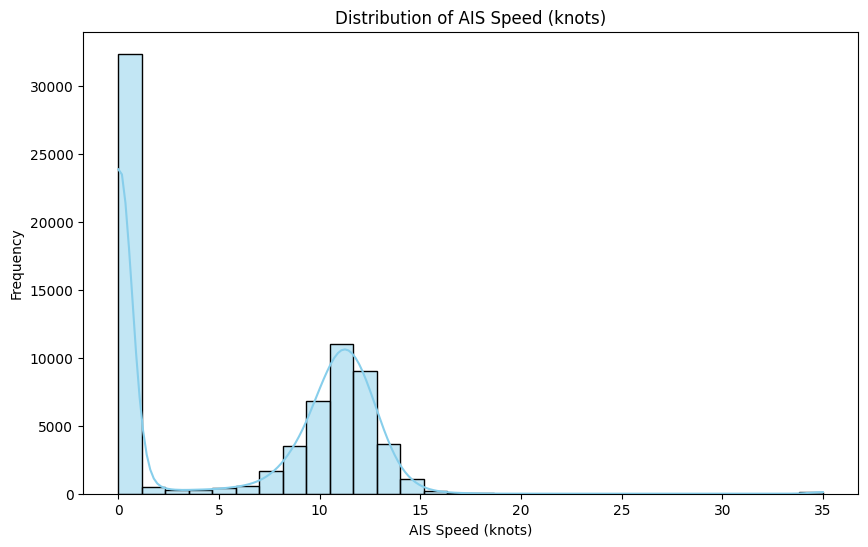


AIS Speed Summary Statistics (after cleaning):
count    71635.000000
mean         5.985649
std          5.744908
min          0.000000
25%          0.000000
50%          8.000000
75%         11.200000
max         35.000000
Name: ais_speed, dtype: float64


In [16]:

  plt.figure(figsize=(10, 6))
  sns.histplot(merged_df['ais_speed'].dropna(), kde=True, bins=30, color="skyblue")
  plt.title('Distribution of AIS Speed (knots)')
  plt.xlabel('AIS Speed (knots)')
  plt.ylabel('Frequency')
  plt.show()

  print("\nAIS Speed Summary Statistics (after cleaning):")
  print(merged_df['ais_speed'].describe())


*The AIS speed statistics, from over 71,000 cleaned data points, show an average speed of approximately 6 knots. However, a significant insight is that the 25th percentile is 0.0 knots, indicating at least a quarter of the recorded instances represent stationary vessels (e.g., at port, anchored). This abundance of zero speeds pulls the mean below the median speed of 8 knots. The high standard deviation (5.74 knots), nearly matching the mean, highlights substantial variability in speeds*

Barchart of distribution of ais_draft from vessel_positions.csv

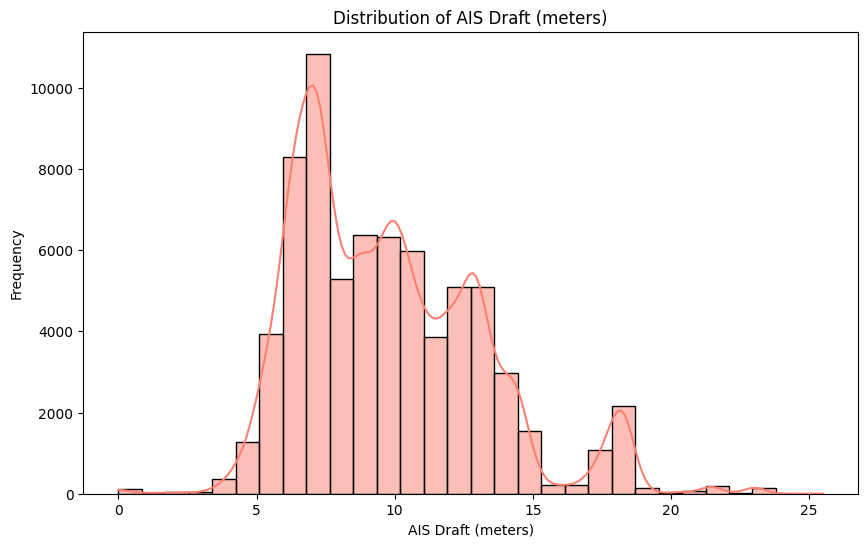


AIS Draft Summary Statistics (after cleaning):
count    71635.000000
mean         9.759088
std          3.408379
min          0.000000
25%          7.100000
50%          9.200000
75%         12.000000
max         25.500000
Name: ais_draft, dtype: float64


In [ ]:

  plt.figure(figsize=(10, 6))
  sns.histplot(merged_df['ais_draft'].dropna(), kde=True, bins=30, color="salmon")
  plt.title('Distribution of AIS Draft (meters)')
  plt.xlabel('AIS Draft (meters)')
  plt.ylabel('Frequency')
  plt.show()

  print("\nAIS Draft Summary Statistics (after cleaning):")
  print(merged_df['ais_draft'].describe())


Box plots of the top 10 operational statuses AIS reported speeds from vessel_positions.csv

<ipython-input-17-57fbce0e2a9b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vessel_operational_status', y='ais_speed', data=df_top_statuses, palette="coolwarm", order=top_statuses)


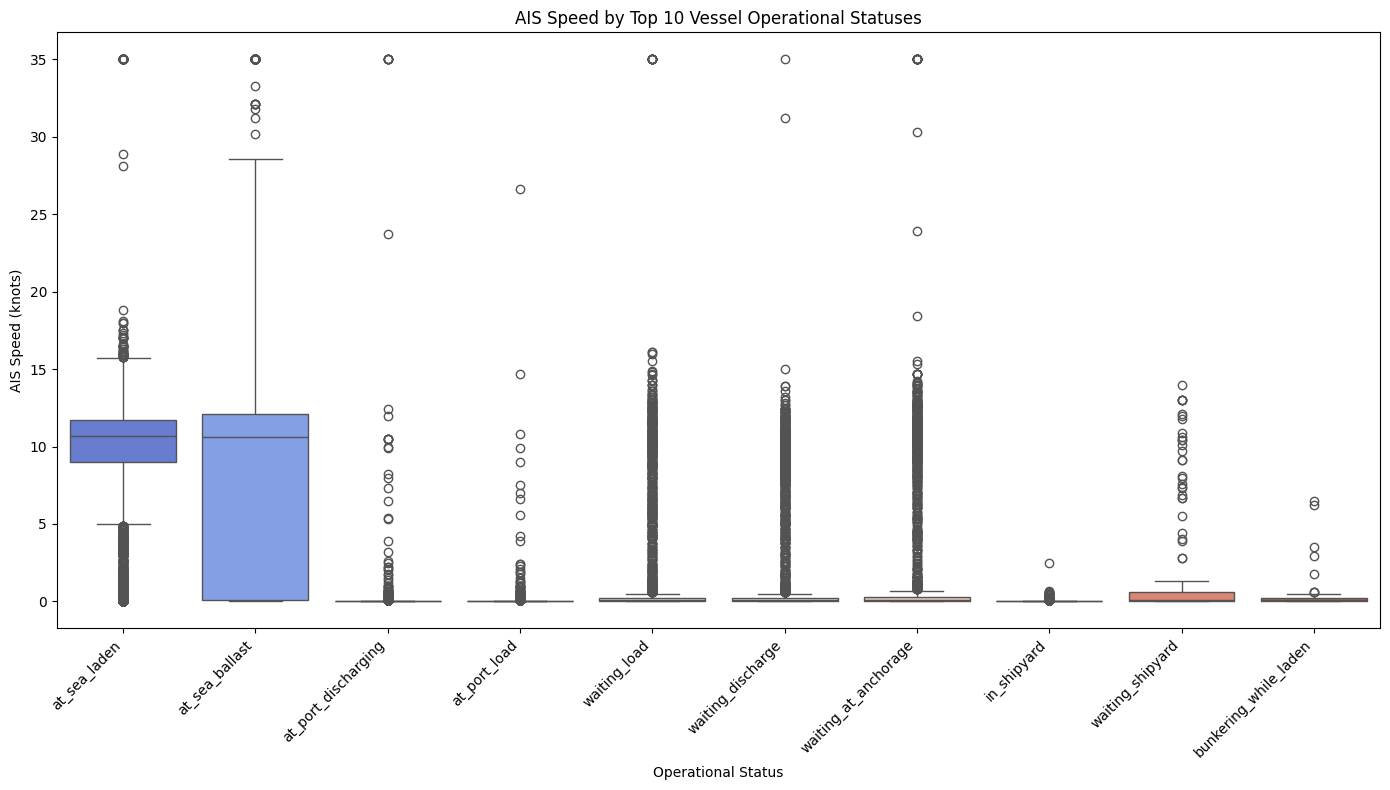


Average AIS Speed by Vessel Operational Status (Top 10):
vessel_operational_status
at_sea_laden             9.469240
at_sea_ballast           7.919294
waiting_at_anchorage     1.874929
waiting_shipyard         1.843506
waiting_discharge        1.116722
waiting_load             1.012081
bunkering_while_laden    0.342105
at_port_discharging      0.086863
at_port_load             0.049092
in_shipyard              0.025628
Name: ais_speed, dtype: float64


In [ ]:

plt.figure(figsize=(14, 8))
    # For better visualization, let's take the top N statuses or a subset
top_statuses = merged_df['vessel_operational_status'].value_counts().nlargest(10).index
df_top_statuses = merged_df[merged_df['vessel_operational_status'].isin(top_statuses)]

sns.boxplot(x='vessel_operational_status', y='ais_speed', data=df_top_statuses, palette="coolwarm", order=top_statuses)
plt.title('AIS Speed by Top 10 Vessel Operational Statuses')
plt.xlabel('Operational Status')
plt.ylabel('AIS Speed (knots)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nAverage AIS Speed by Vessel Operational Status (Top 10):")
print(merged_df.groupby('vessel_operational_status')['ais_speed'].mean().loc[top_statuses].sort_values(ascending=False))


*This data clearly segments average vessel speeds according to their operational status. Unsurprisingly, vessels "at_sea_laden" (9.47 knots) and "at_sea_ballast" (7.92 knots) exhibit the highest average speeds, reflecting active transit. Laden vessels average slightly faster, possibly due to optimized routing or operational priorities when carrying cargo.
Conversely, statuses indicating stationary activities such as "at_port_discharging" (0.09 knots), "at_port_load" (0.05 knots), and "in_shipyard" (0.03 knots) show negligible average speeds, as expected. "Bunkering_while_laden" (0.34 knots) also logically demonstrates very low movement.*

Box plots contarsting Top 10 operational statuses AIS reported drafts

<ipython-input-18-5d77143953a7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vessel_operational_status', y='ais_draft', data=df_top_statuses_draft, palette="PRGn", order=top_statuses)


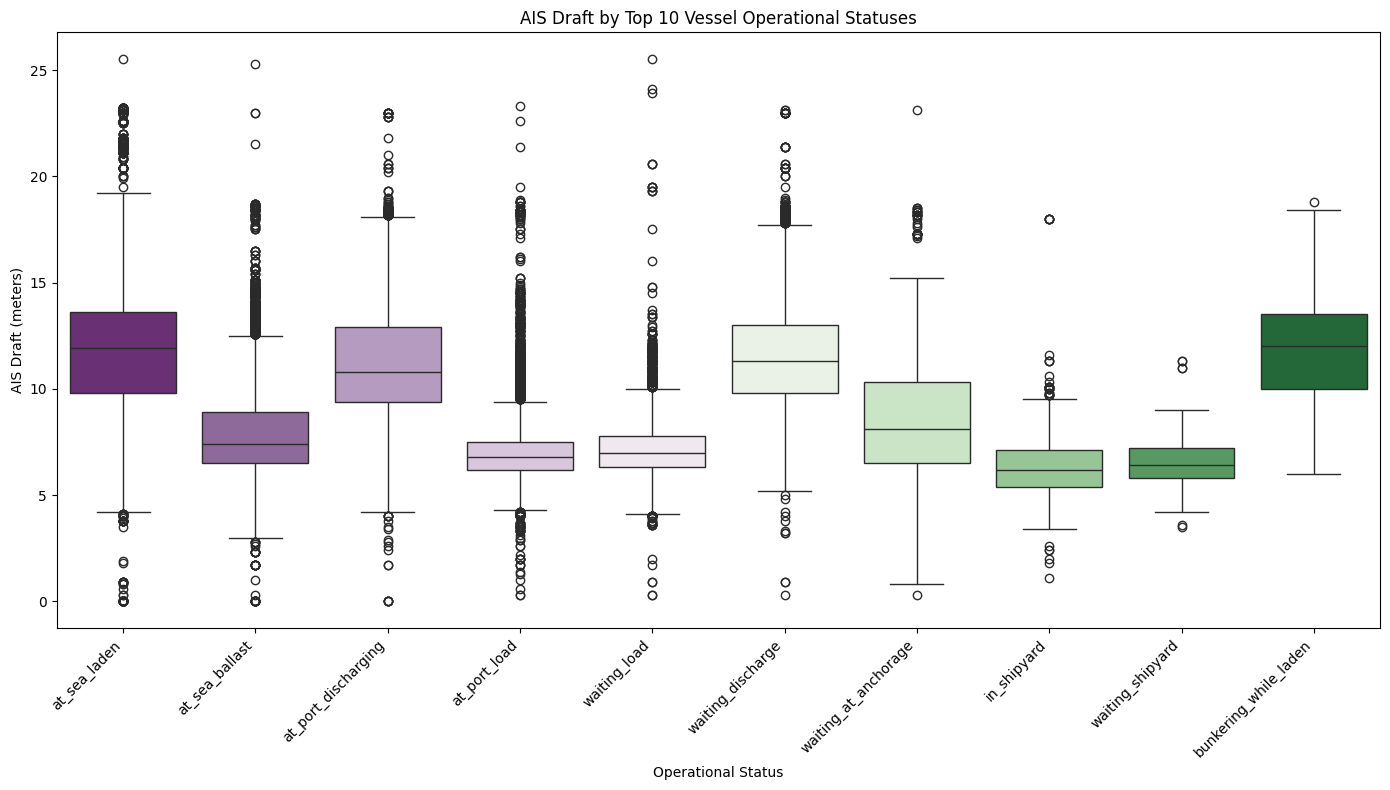


Average AIS Draft by Vessel Operational Status (Top 10):
vessel_operational_status
bunkering_while_laden    12.049474
at_sea_laden             11.965316
waiting_discharge        11.632189
at_port_discharging      11.128966
waiting_at_anchorage      8.692351
at_sea_ballast            7.893605
at_port_load              7.249167
waiting_load              7.235665
waiting_shipyard          6.584416
in_shipyard               6.342426
Name: ais_draft, dtype: float64


In [ ]:

plt.figure(figsize=(14, 8))
# Using the same top_statuses as before for consistency
# top_statuses defined in the previous cell
df_top_statuses_draft = merged_df[merged_df['vessel_operational_status'].isin(top_statuses)]

sns.boxplot(x='vessel_operational_status', y='ais_draft', data=df_top_statuses_draft, palette="PRGn", order=top_statuses)
plt.title('AIS Draft by Top 10 Vessel Operational Statuses')
plt.xlabel('Operational Status')
plt.ylabel('AIS Draft (meters)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nAverage AIS Draft by Vessel Operational Status (Top 10):")
print(merged_df.groupby('vessel_operational_status')['ais_draft'].mean().loc[top_statuses].sort_values(ascending=False))


Scatter plot between AIS reported speeds vs AIS reported Drafts from vessel_positions.csv

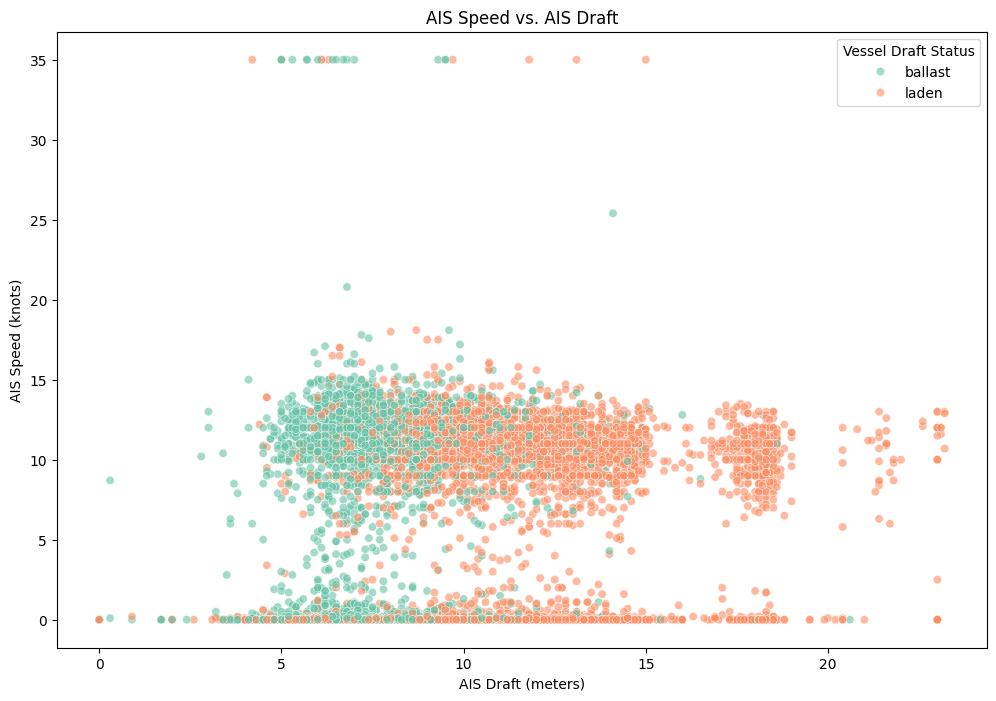

In [ ]:

plt.figure(figsize=(12, 8))
# Using hue='vessel_draft_status'
hue_col = 'vessel_draft_status' if 'vessel_draft_status' in merged_df.columns else None

# For better visualization, sample the data
sample_df = merged_df.sample(n=min(10000, len(merged_df)), random_state=42) if len(merged_df) > 5000 else merged_df

sns.scatterplot(x='ais_draft', y='ais_speed', hue=hue_col, data=sample_df, alpha=0.6, palette="Set2")
plt.title('AIS Speed vs. AIS Draft')
plt.xlabel('AIS Draft (meters)')
plt.ylabel('AIS Speed (knots)')
if hue_col:
        plt.legend(title='Vessel Draft Status')
plt.show()


*We observe that the AIS_Speed reported for the ballast and laden ships are same for 10000 sample points, however the AIS reported draft for laden ships are significantly higher in the scatter plot, showing laden vessels (vessels with cargo) have a higher weight hence greater vertical depth below the waterline due to excess weight.*

In [ ]:
##################################################################################

## TASK **3** (vessel_class)



Classifying vessels based on 'dwt' information from vessel_charachteristics.csv

In [ ]:
def classify_vessel_by_dwt(dwt):
    if pd.isna(dwt):
        return 'Unknown DWT'
    # Ensure dwt is a numeric type for comparison
    try:
        dwt_val = float(dwt)
    except ValueError:
        return 'Invalid DWT'

    if 10000 <= dwt_val <= 39999: # Adjusted based on common practice
        return 'Handymax'
    elif 40000 <= dwt_val <= 59999:
        return 'Supramax'
    elif 60000 <= dwt_val <= 99999:
        return 'Panamax'
    elif dwt_val >= 100000:
        return 'Capesize'
    elif dwt_val < 10000 and dwt_val > 0 : # Vessels smaller than Handymax
        return 'Below Handymax'
    else: # For DWT = 0 or other edge cases not explicitly covered
        return 'Other/Unclassified DWT'


if 'dwt' in merged_df.columns:
    merged_df['vessel_class'] = merged_df['dwt'].apply(classify_vessel_by_dwt)
    print("`vessel_class` column created.")
    print(merged_df[['imo', 'dwt', 'vessel_class']].head())
else:
    print("Column 'dwt' not found in merged_df. Cannot create 'vessel_class'.")

`vessel_class` column created.
       imo      dwt vessel_class
0  1014149      NaN  Unknown DWT
1  1014163  39815.0     Handymax
2  1014199      NaN  Unknown DWT
3  1014254      NaN  Unknown DWT
4  1014591  39415.0     Handymax


Bar chart of vessel_classes


Number of unique vessels per class:
vessel_class
Panamax        4612
Handymax       2974
Supramax       2673
Unknown DWT    2052
Capesize       2019
Name: count, dtype: int64


<ipython-input-28-17ad7090a44a>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




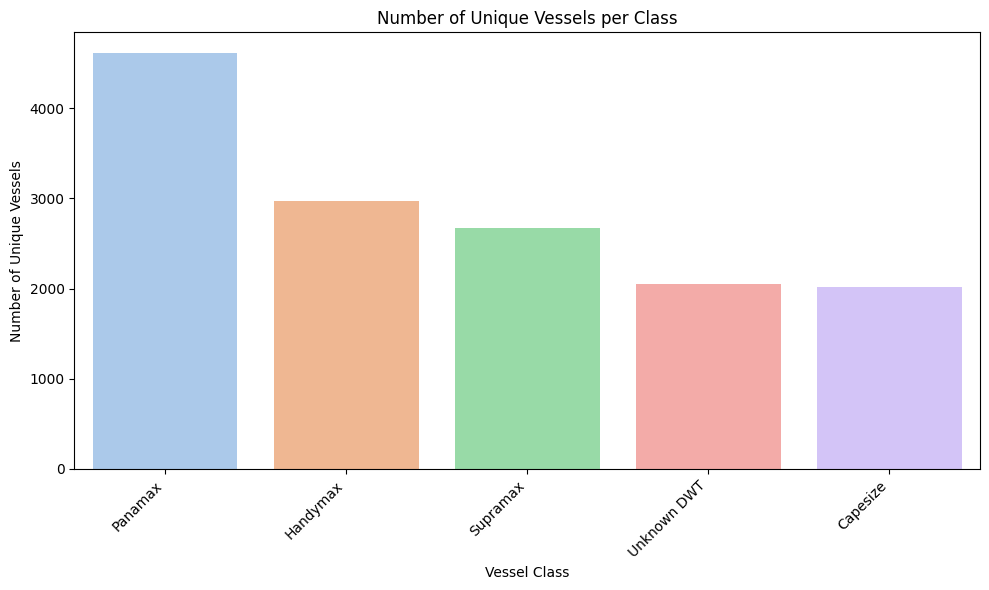

In [ ]:
if 'vessel_class' in merged_df.columns and 'imo' in merged_df.columns:

    # Assuming a vessel doesnt multiple DWT entries as each imo is unique in vessel_charchteristics,
    # this takes the first row for that IMO.
    unique_vessels_class = merged_df.drop_duplicates(subset=['imo'])[['imo', 'vessel_class', 'dwt']]

    vessel_class_counts = unique_vessels_class['vessel_class'].value_counts()

    print("\nNumber of unique vessels per class:")
    print(vessel_class_counts)

    # Provide a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=vessel_class_counts.index, y=vessel_class_counts.values, palette="pastel")
    plt.title('Number of Unique Vessels per Class')
    plt.xlabel('Vessel Class')
    plt.ylabel('Number of Unique Vessels')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns ('vessel_class' or 'imo') not found for summarization.")

#TASK **4** (Cargo Analysis)

Relationship between known commodity groups onboard and vessel_class

Number of unique vessel-commodity-class pairings: 8066

Cross-tabulation (Unique Vessels per Commodity Group & Vessel Class):
vessel_class                    Capesize  Handymax  Panamax  Supramax
vessel_commodity_group_onboard                                       
Agriprods                              1       147      195        96
Breakbulk                              1       261       96       146
Breakbulk/Bulk                         0         1        0         1
Bulk                                 142       411      489       517
Bulk/Iron Ore                          0         1        0         1
Bulk/Iron Products                     0         1        0         0
Coal                                 229       205     1122       482
Coal/Iron Ore                          3         0        1         0
Coal/Steels                            0         0        0         1
Fertilizers                            1       232      184       116
Grain                             

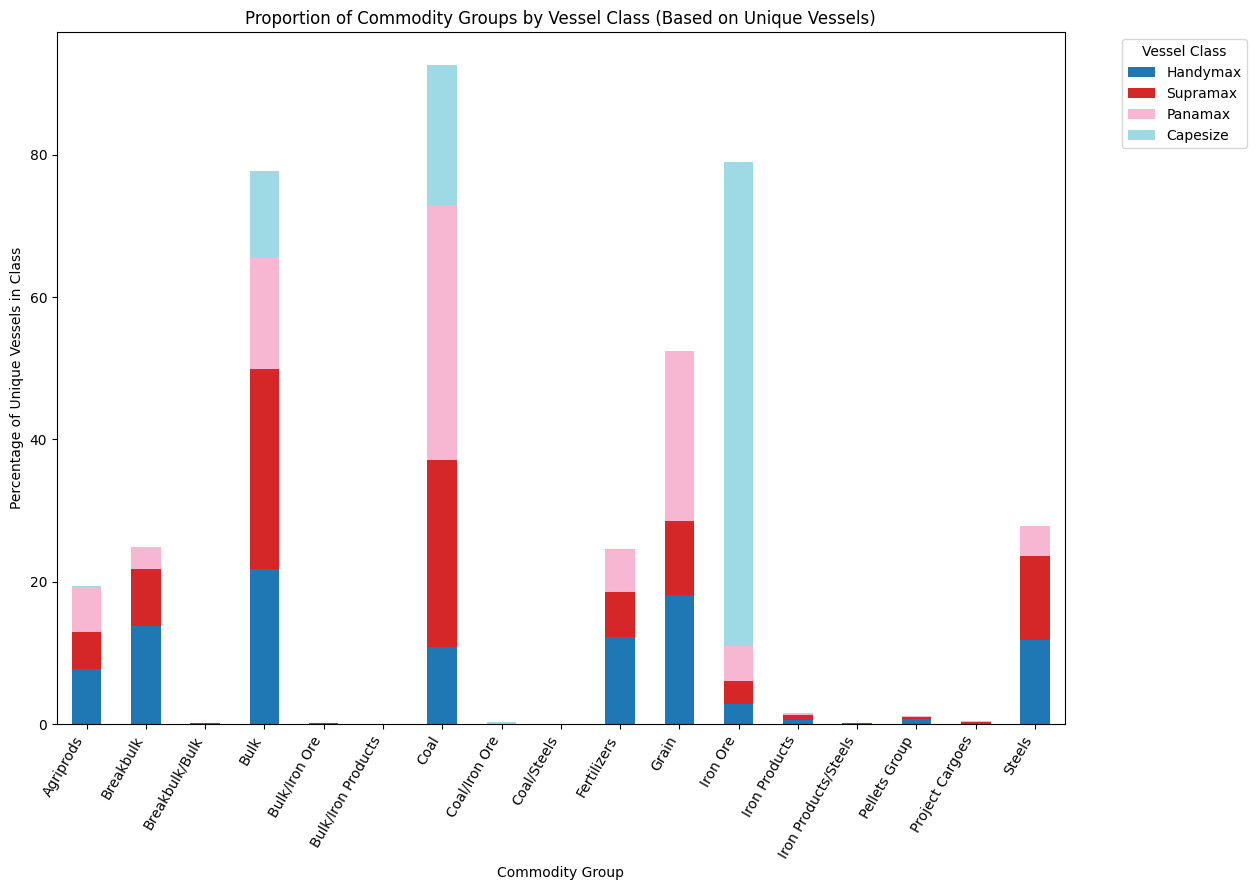

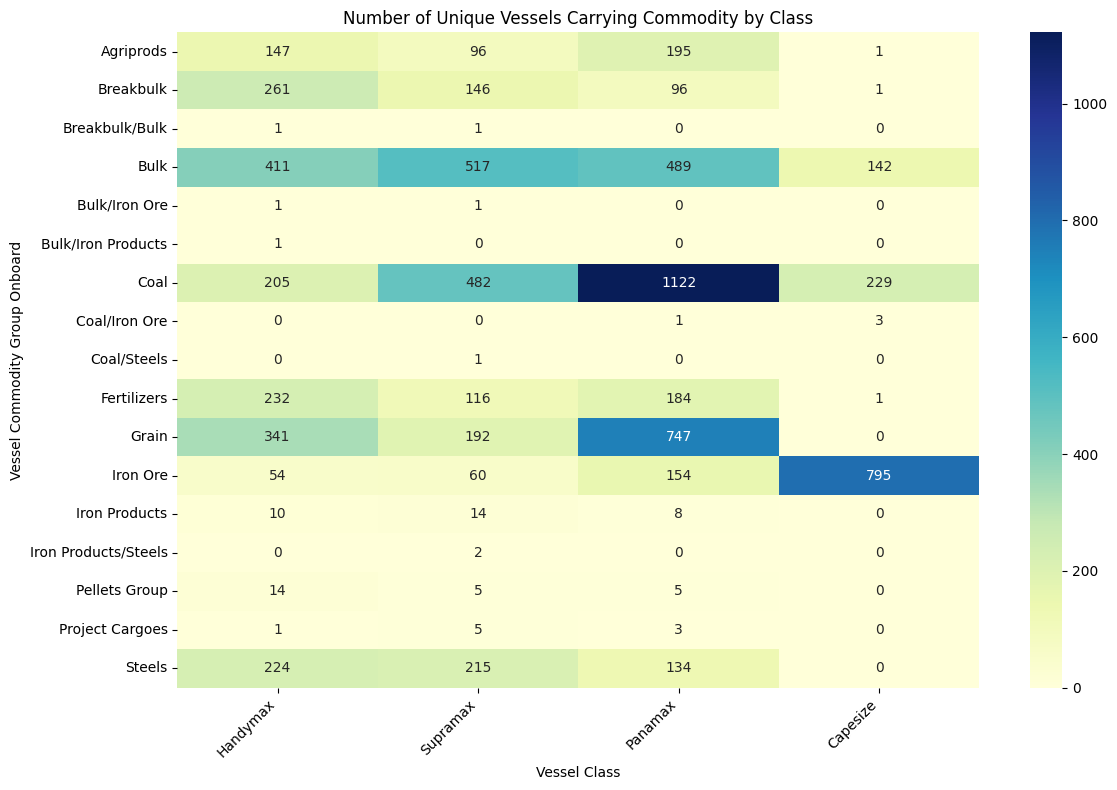

In [ ]:
    # Filter for records where a commodity group is specified and vessel class is known
cargo_analysis_df = merged_df.dropna(subset=['vessel_commodity_group_onboard'])
cargo_analysis_df = cargo_analysis_df[
           ~cargo_analysis_df['vessel_class'].isin(['Unknown DWT'])
]



        # Create a DataFrame of unique vessel-commodity-class combinations
        # This tells us *which* unique ships of a certain class carried *which* unique commodity
unique_vessel_commodity_class = cargo_analysis_df.drop_duplicates(
        subset=['imo', 'vessel_class', 'vessel_commodity_group_onboard']
)
print(f"Number of unique vessel-commodity-class pairings: {len(unique_vessel_commodity_class)}")


            # Create a cross-tabulation: Count of unique vessels per commodity group and vessel class
commodity_vessel_class_ct_unique = pd.crosstab(
                unique_vessel_commodity_class['vessel_commodity_group_onboard'],
                unique_vessel_commodity_class['vessel_class']
)
print("\nCross-tabulation (Unique Vessels per Commodity Group & Vessel Class):")
print(commodity_vessel_class_ct_unique)

            # Define a consistent order for vessel classes for plotting
class_order = ['Below Handymax', 'Handymax', 'Supramax', 'Panamax', 'Capesize']
            # Filter ct for existing classes and reorder
commodity_vessel_class_ct_unique_ordered = commodity_vessel_class_ct_unique.reindex(
                columns=[col for col in class_order if col in commodity_vessel_class_ct_unique.columns],
                fill_value=0
)


            # Visualization 1: Stacked Bar Chart (Proportions)
            # Normalize by the total number of unique vessels in each class carrying *any* cargo
            # to see the proportion of commodity types within each vessel class.
if not commodity_vessel_class_ct_unique_ordered.empty:
                # Sum of unique vessels per class (denominator for percentage)
                # This represents unique vessels in each class that were observed carrying *at least one* commodity.
  total_unique_vessels_by_class_carrying_cargo = unique_vessel_commodity_class.drop_duplicates(
                subset=['imo', 'vessel_class']
  )['vessel_class'].value_counts()

                # Ensure the Series used for division aligns with the crosstab columns
                # If a class in commodity_vessel_class_ct_unique_ordered is not in total_unique_vessels_by_class_carrying_cargo
                # (e.g., no vessels of that class carried any cargo), its sum would be 0, leading to NaN/inf if not handled.


  commodity_vessel_class_pct_unique = commodity_vessel_class_ct_unique_ordered.apply(
                lambda x: (x / total_unique_vessels_by_class_carrying_cargo[x.name]) * 100 if x.name in total_unique_vessels_by_class_carrying_cargo and total_unique_vessels_by_class_carrying_cargo[x.name] > 0 else 0,
                    axis=0
    )
                # Filter out rows (commodities) that sum to 0 across all classes to make plot cleaner
  commodity_vessel_class_pct_unique = commodity_vessel_class_pct_unique.loc[(commodity_vessel_class_pct_unique.sum(axis=1) > 0)]


  commodity_vessel_class_pct_unique.plot(kind='bar', stacked=True, figsize=(15, 9), colormap='tab20')
  plt.title('Proportion of Commodity Groups by Vessel Class (Based on Unique Vessels)')
  plt.xlabel('Commodity Group')
  plt.ylabel('Percentage of Unique Vessels in Class')
  plt.xticks(rotation=60, ha='right')
  plt.legend(title='Vessel Class', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
  plt.show()

                # Visualization 2: Heatmap for better clarity on counts
  plt.figure(figsize=(12, 8))
  sns.heatmap(commodity_vessel_class_ct_unique_ordered, annot=True, fmt="d", cmap="YlGnBu")
  plt.title('Number of Unique Vessels Carrying Commodity by Class')
  plt.xlabel('Vessel Class')
  plt.ylabel('Vessel Commodity Group Onboard')
  plt.xticks(rotation=45, ha='right')
  plt.yticks(rotation=0)
  plt.tight_layout()
  plt.show()


We can see from the bar chart that cape size vessels (largest dwt) mostly carry iron ore(795).

While Panamax vessels mostly carry coal(1122), Grain(747) & Bulk(489)

While Supramax vessels carry Bulk (517) and Coal (482)

Finally Handymax (smallest dwt) mostly carry Bulk (411), Grain(341) and BreakBulk(261).

In [ ]:
############################################################################

#  TASK **5** (PLOTLY SE ASIA MAP)

In [ ]:


# Import necessary libraries for geographical analysis and plotting
import geopandas
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt


In [ ]:
# Approximate coordinates for a polygon encompassing Southeast Asia
# (Longitude, Latitude) pairs

southeast_asia_polygon_coords = [
    (92, 28),    # NW Myanmar/India border area
    (100, 28),   # Northern Thailand/Laos
    (110, 23),   # Northern Vietnam/Hainan
    (120, 23),   # Northern Philippines
    (128, 10),   # East of Philippines
    (141, 0),    # Eastern Indonesia (Papua) - Top
    (141, -12),  # Eastern Indonesia (Papua) - Bottom
    (115, -12),  # Southern Indonesia/NW Australia
    (95, -10),   # West of Sumatra
    (92, 7),     # Andaman Sea / West of Thailand/Myanmar
    (92, 28)     # Close the polygon
]

sea_polygon = Polygon(southeast_asia_polygon_coords)

print("Southeast Asia Polygon defined.")

Southeast Asia Polygon defined.


Plotly map of last known location vessels within SE ASIA region

In [ ]:

# 'merged_df' and 'sea_polygon'
# are available from previous steps.

# Import necessary libraries

import plotly.express as px
import plotly.graph_objects as go


# --- Task 5: Geographical Analysis ---

# 5.1 Prepare vessel data for plotting (last known positions)
# Get last known positions, ensure coordinates are numeric, and drop NaNs

last_positions_df = merged_df.loc[merged_df.groupby('imo')['status_date_time'].idxmax()].copy()
last_positions_df['ais_lat'] = pd.to_numeric(last_positions_df['ais_lat'], errors='coerce')
last_positions_df['ais_long'] = pd.to_numeric(last_positions_df['ais_long'], errors='coerce')
vessels_to_plot_df = last_positions_df.dropna(subset=['ais_long', 'ais_lat'])

    # Determine if points are inside the polygon for coloring
if not vessels_to_plot_df.empty and sea_polygon:
    vessels_to_plot_df['is_in_polygon'] = [
        'Inside Polygon' if sea_polygon.contains(Point(lon, lat)) else 'Outside Polygon'
        for lon, lat in zip(vessels_to_plot_df['ais_long'], vessels_to_plot_df['ais_lat'])
    ]
elif sea_polygon:
    vessels_to_plot_df['is_in_polygon'] = 'Outside Polygon' # Default if no vessels
else:
      print("Warning: sea_polygon is not defined.")
      vessels_to_plot_df['is_in_polygon'] = 'Polygon Undefined'



# 5.2 Generate map with Plotly Express
if not vessels_to_plot_df.empty and sea_polygon:
    print(f"\nPlotting {len(vessels_to_plot_df)} vessels with Plotly Express...")
    poly_lons, poly_lats = sea_polygon.exterior.xy

    fig_plotly = px.scatter_mapbox(
        vessels_to_plot_df,
        lat="ais_lat", lon="ais_long", color="is_in_polygon",
        color_discrete_map={'Inside Polygon': 'green', 'Outside Polygon': 'red', 'Polygon Undefined': 'grey'},
        hover_name="name",
        hover_data={"imo": True, "vessel_class": True, "status_date_time": True, "ais_lat": ':.4f', "ais_long": ':.4f'},
        size_max=10, zoom=3, height=700, title="Vessel Last Positions and Southeast Asia Polygon"
    )

    polygon_layer = {
        "sourcetype": "geojson",
        "source": {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [list(zip(poly_lons, poly_lats))]}},
        "type": "fill", "color": "rgba(0,100,255,0.2)", "below": "traces"
    }

    fig_plotly.update_layout(
        mapbox_style="open-street-map", mapbox_layers=[polygon_layer],
        margin={"r":0,"t":40,"l":0,"b":0}, legend_title_text='Vessel Location',
        mapbox_center_lon=sea_polygon.centroid.x, mapbox_center_lat=sea_polygon.centroid.y
    )
    fig_plotly.show()
else:
    print("Skipping Plotly map: No valid vessel data or sea_polygon is not defined.")

# 5.3 Identify Vessels within the Polygon

# Option 1: Vessels whose *last known position* is within the polygon
if not vessels_to_plot_df.empty and sea_polygon:
    # We can reuse the 'is_in_polygon' column if already calculated
    vessels_inside_df = vessels_to_plot_df[vessels_to_plot_df['is_in_polygon'] == 'Inside Polygon']
    print(f"\nNumber of unique vessels (last known position) inside polygon: {len(vessels_inside_df)}")
    if not vessels_inside_df.empty:
        print("IMOs (last known position) inside polygon:", vessels_inside_df['imo'].unique().tolist() [:100])
        print("Details (first 5):\n", vessels_inside_df[['imo', 'name', 'vessel_class', 'ais_lat', 'ais_long']].head())

# Option 2: Vessels that had *any position record from 20 aug to 24 aug* within the polygon
if 'imo' in merged_df.columns and sea_polygon:
    all_positions_valid = merged_df.dropna(subset=['ais_long', 'ais_lat']).copy()
    all_positions_valid['ais_long'] = pd.to_numeric(all_positions_valid['ais_long'], errors='coerce')
    all_positions_valid['ais_lat'] = pd.to_numeric(all_positions_valid['ais_lat'], errors='coerce')
    all_positions_valid.dropna(subset=['ais_long', 'ais_lat'], inplace=True)

    if not all_positions_valid.empty:
        # Use a list comprehension for boolean indexing
        points = [Point(lon, lat) for lon, lat in zip(all_positions_valid['ais_long'], all_positions_valid['ais_lat'])]
        is_inside_mask = [sea_polygon.contains(p) for p in points]
        records_in_polygon_df = all_positions_valid[is_inside_mask]

        if not records_in_polygon_df.empty:
            unique_imos_ever_in = records_in_polygon_df['imo'].unique()
            print(f"\nNumber of unique vessels (any position) inside polygon: {len(unique_imos_ever_in)}")
            print("IMOs (any position) inside polygon:", unique_imos_ever_in.tolist()[:100])
        else:
            print("No vessel records found (any position) inside the polygon.")
    else:
        print("No valid coordinates in merged_df for 'any position' check.")
else:
    print("Cannot perform 'any position' check: 'imo' or coordinate columns missing, or sea_polygon undefined.")


Plotting 14330 vessels with Plotly Express...



Number of unique vessels (last known position) inside polygon: 2569
IMOs (last known position) inside polygon: [1014591, 1014931, 1014955, 1015428, 1017141, 1017775, 1019046, 1019553, 1023229, 1023700, 1026673, 1030167, 1030478, 1033107, 1035349, 1037907, 1041726, 1045019, 1050911, 1052256, 1053365, 1053793, 1053808, 1053896, 1054577, 1055208, 1056941, 1059307, 1059981, 1060320, 1062964, 1066154, 1068011, 1069601, 1069742, 1072397, 7518551, 7700269, 7801312, 7810753, 8200656, 8200668, 8316481, 8324232, 8356869, 8357100, 8357277, 8357459, 8357681, 8413021, 8537774, 8590960, 8591093, 8591249, 8591471, 8591811, 8591885, 8594136, 8655980, 8655992, 8656570, 8656609, 8662775, 8671099, 8671532, 8672055, 8672407, 8672548, 8672744, 8687206, 8701519, 8740967, 8744195, 8748397, 8783957, 8806412, 8822105, 8892447, 9000326, 9047013, 9050395, 9052329, 9054846, 9070735, 9072252, 9075321, 9078335, 9081198, 9081801, 9082752, 9082908, 9083081, 9085936, 9086930, 9087740, 9095400, 9097032, 9100085, 91021

#TASK **6** (Putting It All Together)

In [ ]:
print(records_in_polygon_df.head())

    index      imo  vessel_dwt status_date_time  in_blackout  ais_speed  \
3       3  1014254       13465       2024-08-20            0       11.8   
4       4  1014591       39415       2024-08-20            0       11.0   
5       5  1014931       39983       2024-08-20            0        0.0   
11     11  1017141       12466       2024-08-20            0        0.2   
12     12  1017775       12333       2024-08-20            0       10.8   

    ais_draft  vessel_speed_ratio  ais_lat  ais_long  ... next_ss_date  \
3         9.5                 NaN  11.7398  109.4890  ...          NaN   
4        10.6                 NaN  16.4267  113.8580  ...   2029-07-29   
5         6.8                 NaN   0.1806  117.4940  ...   2029-07-24   
11        5.6                 NaN  -1.5273  127.3800  ...          NaN   
12        5.1                 NaN   9.2286   96.9266  ...          NaN   

    class_society cranes_type cranes_number cranes_swl cranes_outreach  \
3             NaN         NaN 

records_in_polygon_df contain all the records between 20  and 24 AUG of vessels that passed SE ASIA REGION

In [ ]:
#Q6 mentions the vessels that loaded cargo in SE ASIA, hence the statuses below include the same
statuses_to_include = [
    'at_sea_laden',
    'at_port_load',
    'bunkering_while_laden',
    'at_port_load_sts',
    'passing_canal_laden',
    'waiting_load'
]

#Filtering all the vessels if they are loading cargo within SE ASIA
records_in_polygon_df = records_in_polygon_df[records_in_polygon_df['vessel_operational_status'].isin(statuses_to_include) ]

#Filtering first observations based on IMO prevents repeat of vessel observations
#This helps in analyzing vessel_commodity_onboard, origin_country_name, real_destination_country_name
idx = records_in_polygon_df.groupby('imo')['status_date_time'].idxmin()
first_observations_by_time_df = records_in_polygon_df.loc[idx]
print(first_observations_by_time_df.shape)

(1999, 226)


Barchart of the top 20 commodities of vessels that passed through SE  ASIA between 20 and 24 AUG

Assuming commodity onboard hasnt changed between 20 and 24 aug

<ipython-input-33-dd271e6ce68f>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




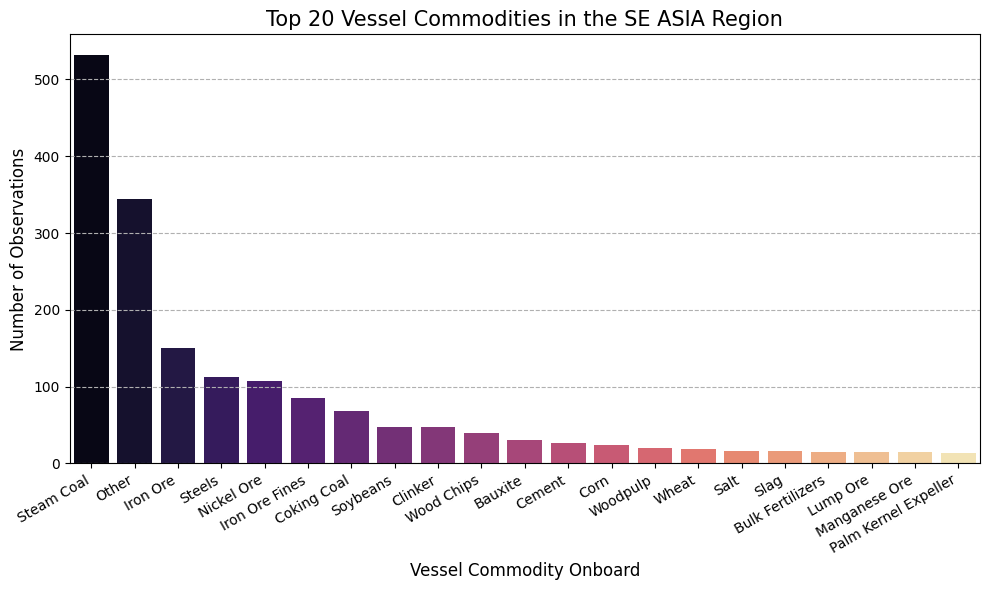

In [ ]:
commodity_col = 'vessel_commodity_onboard'
commodity_counts = first_observations_by_time_df[commodity_col].value_counts(dropna=True)
top_n = 20


    # Using Seaborn for Top N
plot_df_top_n = first_observations_by_time_df.copy()
top_n_categories = commodity_counts.head(top_n).index.tolist()
    # Create a new column that groups non-top N categories into 'Other'
plot_df_top_n['commodity_grouped'] = plot_df_top_n[commodity_col].apply(
        lambda x: x if pd.isna(x) or x in top_n_categories else 'Other'
)

grouped_counts = plot_df_top_n['commodity_grouped'].value_counts()
grouped_order = grouped_counts.index

plt.figure(figsize=(10, 6))
sns.countplot(data=plot_df_top_n, x='commodity_grouped', order=grouped_order, palette='magma')
plt.title(f'Top {top_n} Vessel Commodities in the SE ASIA Region', fontsize=15)
plt.xlabel('Vessel Commodity Onboard', fontsize=12)
plt.ylabel('Number of Observations', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

top 2 exports from each country in Southeast Asia

Assuming destination and origin countries haven't changed between 20 and 24 aug as imputation was done in preprocessing

In [ ]:




# Step 1: Define Southeast Asian Countries
# (This list can be adjusted based on your specific definition)
sea_countries = [
    'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia',
    'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam'
]

#  Step 2: Filter Data
# Filter for SEA countries and drop rows with missing essential info for this analysis
sea_df = first_observations_by_time_df[
    first_observations_by_time_df['origin_country_name'].isin(sea_countries)
].copy()

# Drop rows where commodity or destination is NaN
sea_df.dropna(subset=['vessel_commodity_onboard', 'real_destination_country_name'], inplace=True)

if sea_df.empty:
    print("No data found for Southeast Asian countries after filtering.")
else:
    # Step 3: Find Top 2 Exports per Country
    print("--- Top 2 Exports from each Southeast Asian Country ---")

    # Group by origin country, then count commodities within each country
    # Then, for each country group, get the top 2 commodities
    top_exports_series = sea_df.groupby('origin_country_name')['vessel_commodity_onboard'] \
                               .value_counts() \
                               .groupby(level=0, group_keys=False).head(2)

    # 'top_exports_series' is a Series with a MultiIndex: (origin_country_name, vessel_commodity_onboard)
    # and values as the counts of those exports.


    top_commodities_by_country = {}
    if not top_exports_series.empty:
        for (country, commodity), count in top_exports_series.items():
            if country not in top_commodities_by_country:
                top_commodities_by_country[country] = []
            if len(top_commodities_by_country[country]) < 2: # Ensure we only store up to 2
                top_commodities_by_country[country].append(commodity)
            print(f"Country: {country}, Commodity: {commodity}, Shipments: {count}")
    else:
        print("No export data found to determine top exports.")


    # Step 4: Find Destinations for These Top Exports
    print("\n--- Destination of Top Exports ---")
    if not top_commodities_by_country:
        print("No top exports identified to find destinations for.")
    else:
        for country, top_commods in top_commodities_by_country.items():
            print(f"\nOrigin Country: {country}")
            for commodity in top_commods:
                print(f"  Export: {commodity}")

                # Filter the SEA DataFrame for this specific country and commodity
                destinations_df = sea_df[
                    (sea_df['origin_country_name'] == country) &
                    (sea_df['vessel_commodity_onboard'] == commodity)
                ]

                # Count the destinations for these specific shipments
                destination_counts = destinations_df['real_destination_country_name'].value_counts()

                if destination_counts.empty:
                    print("    -> No specific destination data found for this export.")
                else:
                    for dest_country, count in destination_counts.items():
                        print(f"    -> Destination: {dest_country}, Shipments: {count}")

--- Top 2 Exports from each Southeast Asian Country ---
Country: Indonesia, Commodity: Steam Coal, Shipments: 441
Country: Indonesia, Commodity: Nickel Ore, Shipments: 29
Country: Malaysia, Commodity: Iron Ore, Shipments: 7
Country: Malaysia, Commodity: Palm Kernel Expeller, Shipments: 4
Country: Myanmar, Commodity: Corn, Shipments: 1
Country: Myanmar, Commodity: Rice, Shipments: 1
Country: Philippines, Commodity: Nickel Ore, Shipments: 74
Country: Philippines, Commodity: Steam Coal, Shipments: 3
Country: Singapore, Commodity: Steam Coal, Shipments: 2
Country: Singapore, Commodity: Cement, Shipments: 1
Country: Thailand, Commodity: Gypsum, Shipments: 9
Country: Thailand, Commodity: Rice, Shipments: 4
Country: Vietnam, Commodity: Clinker, Shipments: 25
Country: Vietnam, Commodity: Wood Chips, Shipments: 23

--- Destination of Top Exports ---

Origin Country: Indonesia
  Export: Steam Coal
    -> Destination: China, Shipments: 170
    -> Destination: Indonesia, Shipments: 98
    -> Desti

the most active operators in the SE ASIA during 20-24 AUG

Assuming ship operator is constant between 20 and 24 aug

<ipython-input-36-a19b98b63791>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




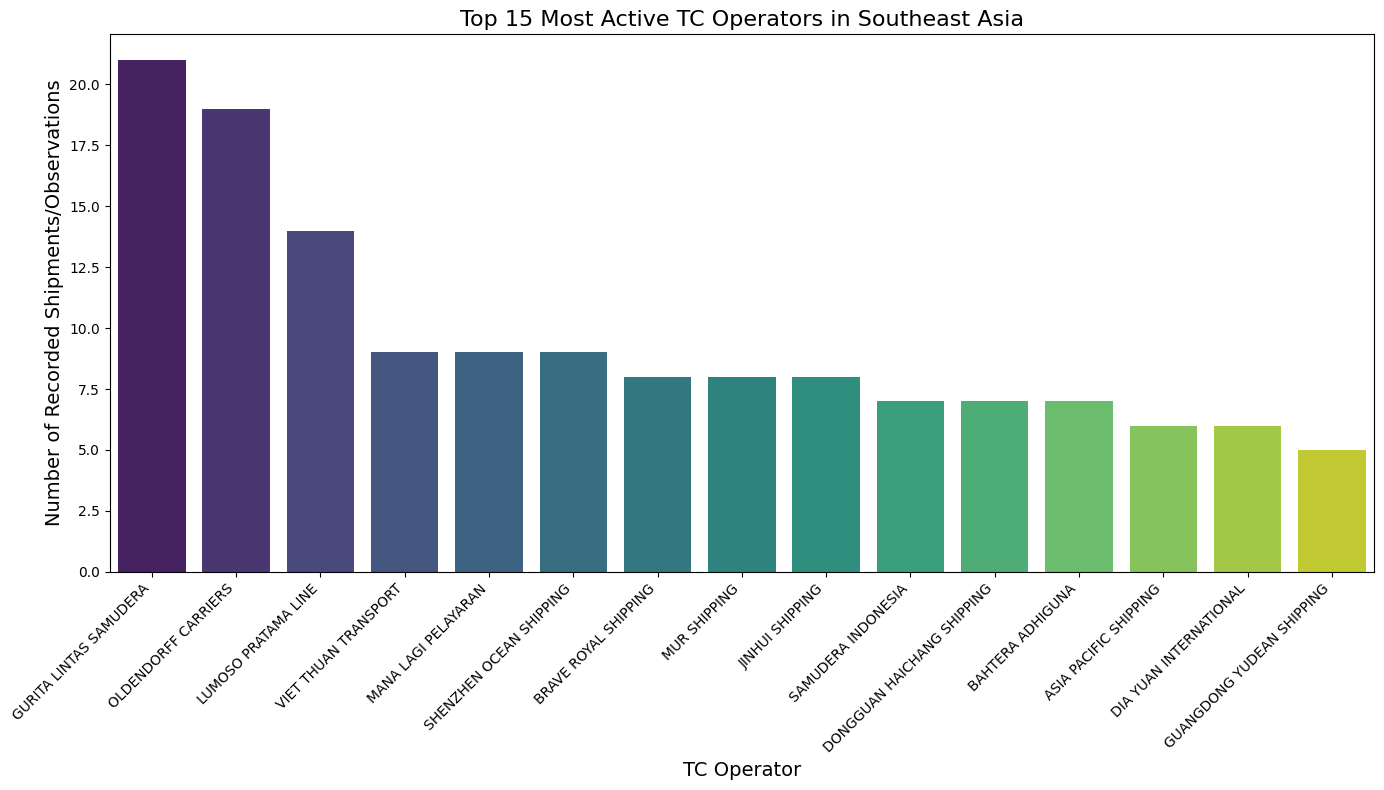


Top 15 Operators and their counts:
tc_operator
GURITA LINTAS SAMUDERA        21
OLDENDORFF CARRIERS           19
LUMOSO PRATAMA LINE           14
VIET THUAN TRANSPORT           9
MANA LAGI PELAYARAN            9
SHENZHEN OCEAN SHIPPING        9
BRAVE ROYAL SHIPPING           8
MUR SHIPPING                   8
JINHUI SHIPPING                8
SAMUDERA INDONESIA             7
DONGGUAN HAICHANG SHIPPING     7
BAHTERA ADHIGUNA               7
ASIA PACIFIC SHIPPING          6
DIA YUAN INTERNATIONAL         6
GUANGDONG YUDEAN SHIPPING      5
Name: count, dtype: int64


In [ ]:



#Assumes that sea operator is constant as data was from vessel_charachteristics.csv
sea_operator_df = first_observations_by_time_df[
        first_observations_by_time_df['origin_country_name'].isin(sea_countries)
].copy() # Use .copy() to avoid SettingWithCopyWarning

    #  Step 2: Count Operator Occurrences

sea_operator_df.dropna(subset=['tc_operator'], inplace=True)


operator_counts = sea_operator_df['tc_operator'].value_counts()


  # Step 3: Select Top N Operators
top_n = 15 # You can adjust this number
top_operators = operator_counts.head(top_n)

  # Step 4: Create Bar Chart
plt.figure(figsize=(14, 8)) # Adjust figure size as needed
sns.barplot(x=top_operators.index, y=top_operators.values, palette="viridis") # Use .index for names, .values for counts

plt.title(f'Top {top_n} Most Active TC Operators in Southeast Asia', fontsize=16)
plt.xlabel('TC Operator', fontsize=14)
plt.ylabel('Number of Recorded Shipments/Observations', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print(f"\nTop {top_n} Operators and their counts:")
print(top_operators)

--- Part 1: Relationship between AIS Draft and Characteristic Draft ---


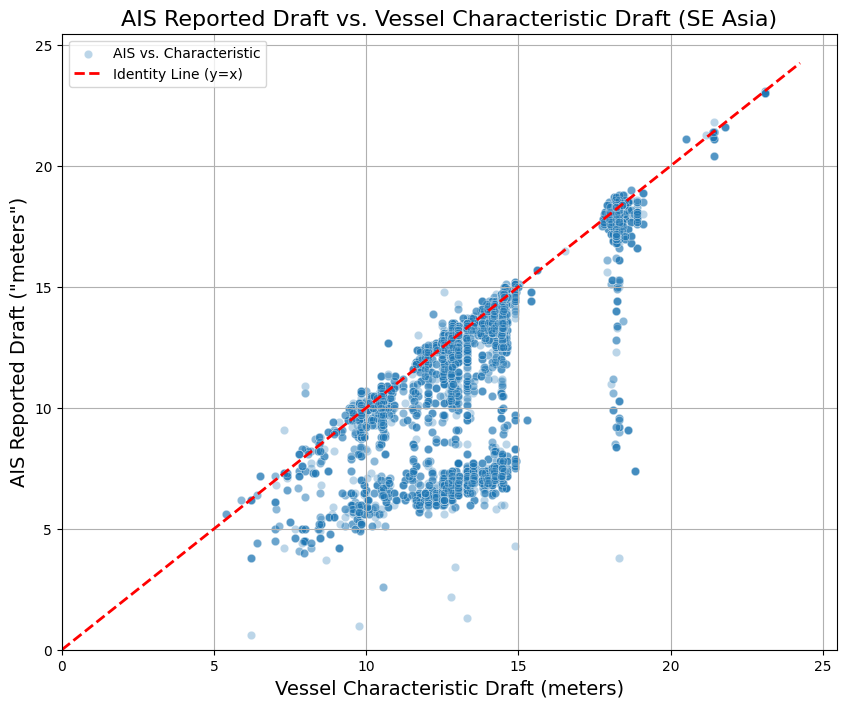


Pearson Correlation between AIS Draft and Characteristic Draft: 0.7580
Number of records where AIS Draft > 105% of Characteristic Draft: 77 (1.32%)
Examples of potential issues (AIS Draft > 1.05 * Characteristic Draft):
          imo  ais_draft  ais_draft  draft status_date_time
482   9104500       10.2       10.2  9.570       2024-08-20
579   9129603       10.0       10.0  9.445       2024-08-20
865   9205639       10.1       10.1  9.550       2024-08-20
1383  9331957        8.3        8.3  7.877       2024-08-20
1756  9414448       10.0       10.0  9.500       2024-08-20

--- Part 2: Deriving if a vessel is finished loading cargo based on draft levels ---


In [ ]:


    print("Part 1: Relationship between AIS Draft and Characteristic Draft")


    draft_compare_df = records_in_polygon_df[['imo', 'ais_draft', 'draft', 'status_date_time', 'vessel_operational_status']].copy() # Include IMO for later grouping

    draft_compare_df['ais_draft'] = pd.to_numeric(draft_compare_df['ais_draft'], errors='coerce')
    draft_compare_df['draft'] = pd.to_numeric(draft_compare_df['draft'], errors='coerce')
    draft_compare_df.dropna(subset=['ais_draft', 'draft'], inplace=True)
    ais_draft_col_to_use = 'ais_draft'


    draft_compare_df = draft_compare_df[draft_compare_df['draft'] > 0] # Characteristic draft should be > 0

    if draft_compare_df.empty:
        print("No valid data available for draft comparison after cleaning.")
    else:
        # 2. Visual Comparison (Scatter Plot)
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='draft', y=ais_draft_col_to_use, data=draft_compare_df, alpha=0.3, label='AIS vs. Characteristic')
        min_val = 0 # Drafts start near 0
        max_val = max(draft_compare_df['draft'].max(), draft_compare_df[ais_draft_col_to_use].max()) * 1.05
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Identity Line (y=x)')
        plt.title('AIS Reported Draft vs. Vessel Characteristic Draft (SE Asia)', fontsize=16)
        plt.xlabel('Vessel Characteristic Draft (meters)', fontsize=14)
        plt.ylabel(f'AIS Reported Draft ("meters")', fontsize=14)
        plt.xlim(left=0)
        plt.ylim(bottom=0)
        plt.legend()
        plt.grid(True)
        plt.show()

        # Calculate difference and ratio
        draft_compare_df['draft_difference_m'] = draft_compare_df['draft'] - draft_compare_df[ais_draft_col_to_use]
        draft_compare_df['draft_ratio'] = draft_compare_df[ais_draft_col_to_use] / draft_compare_df['draft'].replace(0, np.nan)


        # 3. Statistical Summary
        correlation = draft_compare_df[ais_draft_col_to_use].corr(draft_compare_df['draft'])
        print(f"\nPearson Correlation between AIS Draft and Characteristic Draft: {correlation:.4f}")

        issues = draft_compare_df[draft_compare_df[ais_draft_col_to_use] > draft_compare_df['draft'] * 1.05] # allow 5% tolerance
        percentage_issues = (len(issues) / len(draft_compare_df)) * 100
        print(f"Number of records where AIS Draft > 105% of Characteristic Draft: {len(issues)} ({percentage_issues:.2f}%)")
        if not issues.empty and len(issues) < 200:
             print("Examples of potential issues (AIS Draft > 1.05 * Characteristic Draft):")
             print(issues[['imo', 'ais_draft', ais_draft_col_to_use, 'draft', 'status_date_time']].head())



*Deriving whether a vessel has finished loading cargo based on draft levels involves comparing its current ais_draft (the dynamically reported draft from the AIS system) against known static "ship draft" characteristics, specifically its maximum design draft or summer load line draft.
Initially, an unladen or ballasted vessel will have a relatively low ais_draft. As cargo is loaded, the vessel sinks deeper into the water, causing its ais_draft to progressively increase.
A vessel can be considered "finished loading" when its ais_draft approaches and then stabilizes near its maximum permissible draft. This maximum draft is a fixed characteristic for each ship, often determined by its load lines (e.g., Summer, Winter, Tropical). If the ais_draft reaches, say, 95-100% of this maximum design draft and then remains relatively constant over several AIS updates (indicating no further significant increase), it's a strong indication that loading operations have concluded.*